In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = "MoviesOnStreamingPlatforms_updated.csv"
df = pd.read_csv(data)

In [35]:
df.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [4]:
df.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
Unnamed: 0         16744 non-null int64
ID                 16744 non-null int64
Title              16744 non-null object
Year               16744 non-null int64
Age                7354 non-null object
IMDb               16173 non-null float64
Rotten Tomatoes    5158 non-null object
Netflix            16744 non-null int64
Hulu               16744 non-null int64
Prime Video        16744 non-null int64
Disney+            16744 non-null int64
Type               16744 non-null int64
Directors          16018 non-null object
Genres             16469 non-null object
Country            16309 non-null object
Language           16145 non-null object
Runtime            16152 non-null float64
dtypes: float64(2), int64(8), object(7)
memory usage: 2.2+ MB


In [6]:
df.isnull().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [7]:
def uniquevalues(data):
    for i in data:
        print(i, "=", data[i].unique(), end = "\n\n")
print(df)

       Unnamed: 0     ID                                        Title  Year  \
0               0      1                                    Inception  2010   
1               1      2                                   The Matrix  1999   
2               2      3                       Avengers: Infinity War  2018   
3               3      4                           Back to the Future  1985   
4               4      5               The Good, the Bad and the Ugly  1966   
5               5      6            Spider-Man: Into the Spider-Verse  2018   
6               6      7                                  The Pianist  2002   
7               7      8                             Django Unchained  2012   
8               8      9                      Raiders of the Lost Ark  1981   
9               9     10                         Inglourious Basterds  2009   
10             10     11                                  Taxi Driver  1976   
11             11     12                            

In [8]:
# filling missing values
#if the movie in Disney+, target group is 13+, otherwise is 18+
#df.loc[df['Age'].isnull() & df['Disney+'] == 1, 'Age'] = '13+
df['Age'].fillna('18+', inplace = True)
df['Age'].isnull().sum()


0

In [9]:
#replace missing values in Runtime
mean1 = round(df['Runtime'].mean(),0)
mean1
df['Runtime'].fillna(mean1, inplace = True)


In [10]:
df.count()

Unnamed: 0         16744
ID                 16744
Title              16744
Year               16744
Age                16744
IMDb               16173
Rotten Tomatoes     5158
Netflix            16744
Hulu               16744
Prime Video        16744
Disney+            16744
Type               16744
Directors          16018
Genres             16469
Country            16309
Language           16145
Runtime            16744
dtype: int64

In [11]:
#replace missing value in Imdb
mean2 = round(df['IMDb'].mean(),1)
mean2
df['IMDb'].fillna(mean2, inplace = True)

In [12]:
#Total number of movies in each platform
netflix_no = df['Netflix'].sum()
hulu_no = df['Hulu'].sum()
prime_no = df['Prime Video'].sum()
disney_no = df['Disney+'].sum()


In [13]:
number_of_platform = [netflix_no, hulu_no, prime_no, disney_no]
cols = ('Netflix', 'Hulu', 'Prime Video', 'Disney+')
total_platform = list(zip(cols, number_of_platform))
platform_counts = pd.DataFrame(data = total_platform, columns = ['platform', "number of movie"])
platform_counts


,platform,number of movie
0,Netflix,3560
1,Hulu,903
2,Prime Video,12354
3,Disney+,564


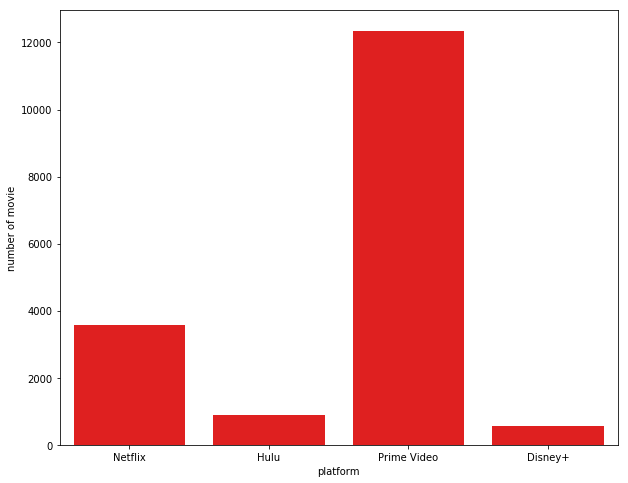

In [14]:
plt.figure(figsize = (10,8))
sns.barplot(x = platform_counts['platform'], y = platform_counts['number of movie'], color = 'r')
plt.show()

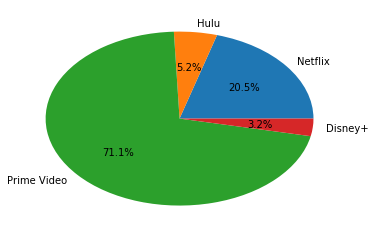

In [15]:
labels = cols
plt.pie(x = number_of_platform, labels = cols, autopct = "%1.1f%%" )
plt.show()

In [16]:
#groupby age
sum_age = df.groupby('Age').sum()
sum_age[['Netflix', 'Hulu', 'Prime Video', 'Disney+']]

,Netflix,Hulu,Prime Video,Disney+
Age,,,,
13+,383,119,819,40
16+,89,17,226,1
18+,2635,603,9987,67
7+,323,109,916,179
all,130,55,406,277


In [17]:
#number of movies produce each year
sum_year = df.groupby('Year').sum()
sum_year[['Netflix', 'Hulu', 'Prime Video', 'Disney+']]

,Netflix,Hulu,Prime Video,Disney+
Year,,,,
1902,0,0,1,0
1912,0,0,1,0
1913,0,0,2,0
1915,0,0,4,0
1916,0,0,1,0
1917,0,0,1,0
1918,0,0,3,0
1919,0,0,2,0
1920,0,0,5,0


In [18]:
df_sort = df.sort_values("IMDb", ascending = False)
#top 10 highest rating
df.loc[df['Netflix']==1][['Title', 'IMDb', 'Genres']].head(5)

,Title,IMDb,Genres
0,Inception,8.8,"Action,Adventure,Sci-Fi,Thriller"
1,The Matrix,8.7,"Action,Sci-Fi"
2,Avengers: Infinity War,8.5,"Action,Adventure,Sci-Fi"
3,Back to the Future,8.5,"Adventure,Comedy,Sci-Fi"
4,"The Good, the Bad and the Ugly",8.8,Western


In [19]:
df.loc[df['Hulu']==1][['Title', 'IMDb', 'Genres']].head(5)

,Title,IMDb,Genres
67,Blackfish,8.1,"Documentary,News"
97,Jiro Dreams of Sushi,7.9,Documentary
146,The Patriot,7.2,"Action,Drama,History,War"
148,The Square,8.1,"Comedy,Drama"
214,Hitch,6.6,"Comedy,Romance"


In [20]:
df.loc[df['Prime Video']==1][['Title', 'IMDb', 'Genres']].head(5)

,Title,IMDb,Genres
4,"The Good, the Bad and the Ugly",8.8,Western
6,The Pianist,8.5,"Biography,Drama,Music,War"
11,3 Idiots,8.4,"Comedy,Drama"
15,Once Upon a Time in the West,8.5,Western
31,Drive,7.8,"Crime,Drama"


In [21]:
df.loc[df['Disney+']==1][['Title', 'IMDb', 'Genres']].head(5)

,Title,IMDb,Genres
95,Saving Mr. Banks,7.5,"Biography,Comedy,Drama"
103,Amy,7.8,Drama
122,Bolt,6.8,"Animation,Adventure,Comedy,Drama,Family"
125,The Princess and the Frog,7.1,"Animation,Adventure,Comedy,Family,Fantasy,Musi..."
150,Miracle,7.5,"Biography,Drama,History,Sport"


In [22]:
#create dataframe with not null Rottan 
rot_df = df[df['Rotten Tomatoes'].notnull()]
rot_df.dtypes

Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [25]:
#covert rottan tomatoes object to float 87% = 87
rot_df['Rotten Tomatoes'] = rot_df['Rotten Tomatoes'].str.rstrip('%').astype('float')


C:\Users\neetu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
rot_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87.0,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87.0,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84.0,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96.0,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97.0,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [27]:
rot_df.dtypes

Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes    float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [40]:
#Average IMDb rate of Netflix, hulu, prime and disney
netflix_no = rot_df['Netflix'].sum()
netflix_imdb = round(rot_df.loc[rot_df['Netflix'] ==1]['IMDb'].mean(),0)
hulu_no = rot_df['Hulu'].sum()
hulu_imdb = round(rot_df.loc[rot_df['Hulu']==1]['IMDb'].mean(),0)
prime_no = rot_df['Prime Video'].sum()
prime_imdb = round(rot_df.loc[rot_df['Prime Video'] ==1]['IMDb'].mean(),0)
disney_no = rot_df['Disney+'].sum()
disney_imdb = round(rot_df.loc[rot_df['Disney+']==1]['IMDb'].mean(),0)



In [41]:
# average rating of Rotten tomatoes
netflix_rotten = round(rot_df.loc[rot_df['Netflix']==1]['Rotten Tomatoes'].mean(), 1)
hulu_rotten = round(rot_df.loc[rot_df['Hulu']==1]['Rotten Tomatoes'].mean())
prime_rotten = round(rot_df.loc[rot_df['Prime Video']==1]['Rotten Tomatoes'].mean(),1)
disney_rotten = round(rot_df.loc[rot_df['Disney+']==1]['Rotten Tomatoes'].mean(),1)

In [45]:
movie_no = (netflix_no, hulu_no, prime_no, disney_no)
col_names = ('Netflix', 'Hulu', 'Prime Video', 'Disney+')
avg_imdb = (netflix_imdb, hulu_imdb, prime_imdb, disney_imdb)
avg_rotten = (netflix_rotten, hulu_rotten, prime_rotten, disney_rotten)
data_list = list(zip(col_names, movie_no, avg_imdb, avg_rotten))
df2 = pd.DataFrame(data = data_list, columns =['Sites', 'Number of Movies', 'Average IMDb', 'Average Rotten'], index = ['a', 'b', 'c', 'd'])

df2

In [46]:
df2

,Sites,Number of Movies,Average IMDb,Average Rotten
a,Netflix,1427,6.0,66.2
b,Hulu,637,6.0,67.0
c,Prime Video,3077,6.0,64.3
d,Disney+,345,7.0,64.3


ValueError: could not convert string to float: 'Number of Movies'

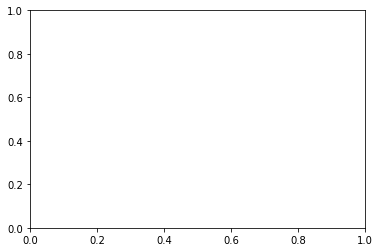

In [48]:
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

plt.pie(x = 'Number of Movies', labels = labels )
plt.show()

In [1]:
import seaborn as sns

In [ ]:
sns.barplot()